In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['2020-21 bios, gen adv, gen trad (edited).csv']), index_col = 'PLAYER')
df.head()



Saving 2020-21 bios, gen adv, gen trad (edited).csv to 2020-21 bios, gen adv, gen trad (edited).csv


,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%,GP.1,W,L,MIN,PTS.1,FGM,FGA,FG%,3:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB.1,AST.1,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,GP.2,W.1,L.1,MIN.1,OFFRTG,DEFRTG,NETRTG.1,AST%.1,AST/TO,AST RATIO,OREB%.1,DREB%.1,REB%,TO RATIO,EFG%,TS%.1,USG%.1,PACE,PIE,POSS,YIN,3PTF,TS% TRUE,Unnamed: 69,Unnamed: 70,HEIGHT (IN)
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,DEN,25,6 8 2021,235,Arizona,USA,2014,1,4,50,12.4,5.7,3.2,2.1,5.50%,15.00%,20.40%,54.70%,16.50%,50,29,21,27.7,12.4,4.6,10.0,46.3,1.2,3.5,33.5,1.9,3.0,65.1,1.5,4.1,5.7,3.2,1.9,0.7,0.7,1.8,26.1,3,1,1.2,50,29,21,27.7,112.5,110.4,2.1,16.5,1.66,19.6,5.5,15.0,10.2,11.8,52.2,54.7,20.4,99.48,9.5,"2,868",7,1,0.547,6,8,80
Aaron Holiday,IND,24,6 1 2000,185,UCLA,USA,2018,1,23,66,7.2,1.3,1.9,-0.2,1.20%,6.00%,18.90%,50.30%,13.90%,66,30,36,17.8,7.2,2.6,6.6,39.0,1.0,2.8,36.8,1.0,1.3,81.9,0.2,1.1,1.3,1.9,1.0,0.7,0.2,1.4,13.3,1,0,0.0,66,30,36,17.8,110.1,110.3,-0.2,13.9,1.86,18.5,1.2,6.0,3.6,9.9,46.7,50.3,18.9,104.34,5.7,"2,560",3,1,0.503,6,1,73
Aaron Nesmith,BOS,21,6 5 2021,215,Vanderbilt,USA,2020,1,14,46,4.7,2.8,0.5,-0.5,4.10%,14.60%,13.30%,57.30%,4.70%,46,22,24,14.5,4.7,1.7,3.9,43.8,0.9,2.3,37.0,0.5,0.6,78.6,0.6,2.2,2.8,0.5,0.5,0.3,0.2,1.9,9.9,0,0,-0.2,46,22,24,14.5,108.6,109.1,-0.5,4.7,1.00,9.7,4.1,14.6,9.3,9.7,55.1,57.3,13.3,101.13,6.0,"1,409",1,1,0.573,6,5,77
Abdel Nader,PHX,27,6 5 2021,225,Iowa State,Egypt,2016,2,58,24,6.7,2.6,0.8,5.0,2.00%,15.10%,18.30%,60.50%,7.80%,24,16,8,14.8,6.7,2.4,4.8,49.1,0.8,1.8,41.9,1.2,1.5,75.7,0.3,2.3,2.6,0.8,0.8,0.4,0.4,1.4,12.5,0,0,1.2,24,16,8,14.8,106.7,101.7,5.0,7.8,1.00,11.2,2.0,15.1,8.8,11.2,56.9,60.5,18.3,102.96,9.2,757,5,1,0.605,6,5,77
Al Horford,BOS,35,6 9 2021,240,Florida,Dominican Rep...,2007,1,3,28,14.2,6.7,3.4,-6.9,3.40%,19.50%,22.10%,53.80%,20.60%,28,11,17,27.9,14.2,5.8,12.9,45.0,2.0,5.4,36.8,0.6,0.8,81.8,1.0,5.7,6.7,3.4,1.0,0.9,0.9,1.7,31.7,1,0,-3.6,28,11,17,27.9,102.2,109.1,-6.9,20.6,3.24,19.2,3.4,19.5,11.4,5.9,52.8,53.8,22.1,100.30,13.1,"1,639",14,1,0.538,6,9,81


In [ ]:
df['3P%'].mean() # The average three-point percentage accuracy for all players in the NBA - used as a threshold that is compared with the predicted 3P%

30.696277915632773

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


train_data = df
# Combinations of feature types
physical = [ "AGE", "WEIGHT", "HEIGHT (IN)", "YIN"]
misc = ["PTS", "REB", "AST", "TS% TRUE", "FT%", "OFFRTG"]
features = ["PTS", "REB", "AST", "TS% TRUE", "FT%", "OFFRTG","AGE", "WEIGHT", "YIN", "HEIGHT (IN)"]

# Individual features 
age = ['AGE']
weight = ['WEIGHT']
hieght = ['HEIGHT (IN)']
yin = ['YIN']
pts = ['PTS']
reb = ['REB']
ast = ['AST']
ts = ['TS% TRUE']
ft = ["FT%"]
off = ["OFFRTG"]



In [ ]:
# Training the classifiers using "physical" attributes
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[physical])
x_test = pd.get_dummies(x_test[physical])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The average accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The average accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The average accuracy score for the Decision Tree model is: 
0.6790123456790124
The average accuracy score for the Random Forest model is: 
0.6666666666666666


In [ ]:
# Training the classifiers using "miscellaneous" attributes
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[misc])
x_test = pd.get_dummies(x_test[misc])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.7530864197530864
The accuracy score for the Random Forest model is: 
0.7901234567901234


In [ ]:
# Training using the physical and the miscellaneous attributes combined
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[features])
x_test = pd.get_dummies(x_test[features])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.7407407407407407
The accuracy score for the Random Forest model is: 
0.8271604938271605


In [ ]:
# Training using the age feature
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[age])
x_test = pd.get_dummies(x_test[age])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.5925925925925926
The accuracy score for the Random Forest model is: 
0.5925925925925926


In [ ]:
# Training using the weight feature
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[weight])
x_test = pd.get_dummies(x_test[weight])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.6172839506172839
The accuracy score for the Random Forest model is: 
0.6172839506172839


In [ ]:
# Training using the height feature
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[hieght])
x_test = pd.get_dummies(x_test[hieght])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.6049382716049383
The accuracy score for the Random Forest model is: 
0.6049382716049383


In [ ]:
# Training using the years in the NBA feature
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[yin])
x_test = pd.get_dummies(x_test[yin])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.5925925925925926
The accuracy score for the Random Forest model is: 
0.5925925925925926


In [ ]:
# Training using the points per game statistic
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[pts])
x_test = pd.get_dummies(x_test[pts])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.7037037037037037
The accuracy score for the Random Forest model is: 
0.691358024691358


In [ ]:
# Training using the rebounds statistic
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[reb])
x_test = pd.get_dummies(x_test[reb])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.6172839506172839
The accuracy score for the Random Forest model is: 
0.6419753086419753


In [ ]:
# Training using the assists sttistic
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[ast])
x_test = pd.get_dummies(x_test[ast])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.6790123456790124
The accuracy score for the Random Forest model is: 
0.6790123456790124


In [ ]:
# Training using the real amount of shots made out of taken
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[ts])
x_test = pd.get_dummies(x_test[ts])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.7160493827160493
The accuracy score for the Random Forest model is: 
0.7283950617283951


In [ ]:
# Training using the free throw percentage statistic
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[ft])
x_test = pd.get_dummies(x_test[ft])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.691358024691358
The accuracy score for the Random Forest model is: 
0.6790123456790124


In [ ]:
# Training using a players offensive rating
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['3PTF'], axis=1), train_data['3PTF'], test_size = 0.20, random_state = 0)

x_train = pd.get_dummies(x_train[off])
x_test = pd.get_dummies(x_test[off])

model_dt = DecisionTreeClassifier(max_depth=5, random_state=100)
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
model_rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Computing accuracy
print("The accuracy score for the Decision Tree model is: ")
print(accuracy_score(y_test, pred_dt))
print("The accuracy score for the Random Forest model is: ")
print(accuracy_score(y_test, pred_rf))

The accuracy score for the Decision Tree model is: 
0.5925925925925926
The accuracy score for the Random Forest model is: 
0.6296296296296297


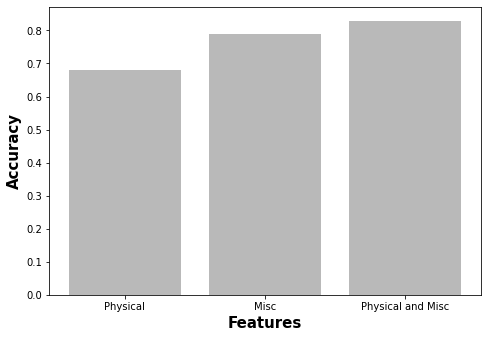

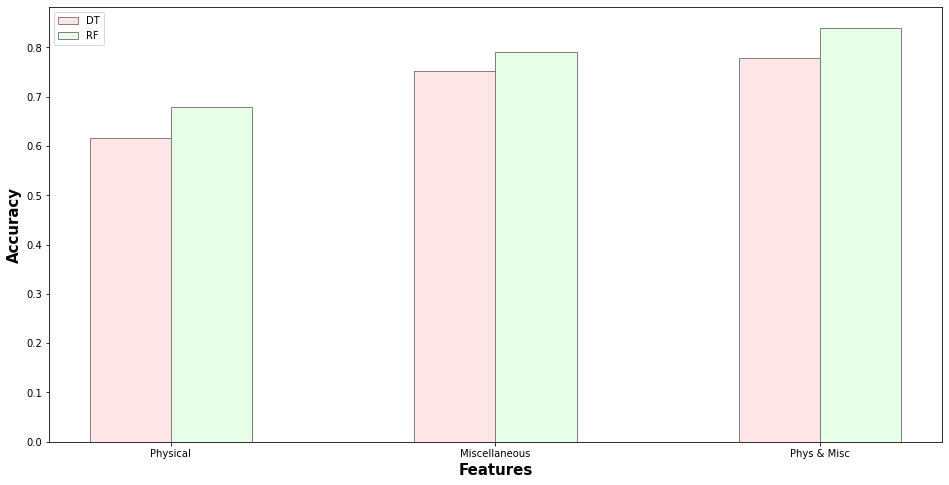

In [1]:
#Visulaizations of the combined physical features, miscellaneous features, and all features
import matplotlib.pyplot as plt

dtplot = plt.figure()
ax = dtplot.add_axes([0,0,1,1])
features = ["Physical", "Misc", "Physical and Misc"]
acc = [0.679, 0.790, 0.830]
ax.bar(features, acc, color = (0.1,0.1,0.1,0.3))
plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(16, 8))
 
# set height of bar
dt = [0.617, 0.753, 0.778]
rf = [0.679, 0.790, 0.840]

# Set position of bar on X axis
br1 = np.arange(len(dt))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, dt, color =(1, 0.05, 0.05, 0.1), width = barWidth,
        edgecolor ='gray', label ='DT')
plt.bar(br2, rf, color =(0.05, 1, 0.05, 0.1), width = barWidth,
        edgecolor ='gray', label ='RF')

 
# Adding Xticks
plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth / 2 for r in range(len(dt))], 
        ['Physical', 'Miscellaneous', 'Phys & Misc'])
 
plt.legend()
plt.show()